# Salary Prediction using Linear Regression

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

In [3]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

Text(0.5, 1.0, 'Salary prediction')

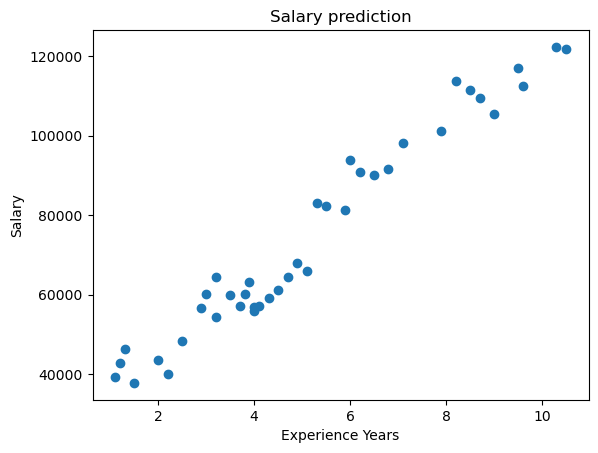

In [4]:
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary prediction')

In [5]:
x = df['Experience Years']
x.head()

0    1.1
1    1.2
2    1.3
3    1.5
4    2.0
Name: Experience Years, dtype: float64

In [6]:
y = df['Salary']
y.head()

0    39343
1    42774
2    46205
3    37731
4    43525
Name: Salary, dtype: int64

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [8]:
x.mean()

5.1525

In [9]:
y.mean()

74743.625

Text(0.5, 1.0, 'Salary prediction')

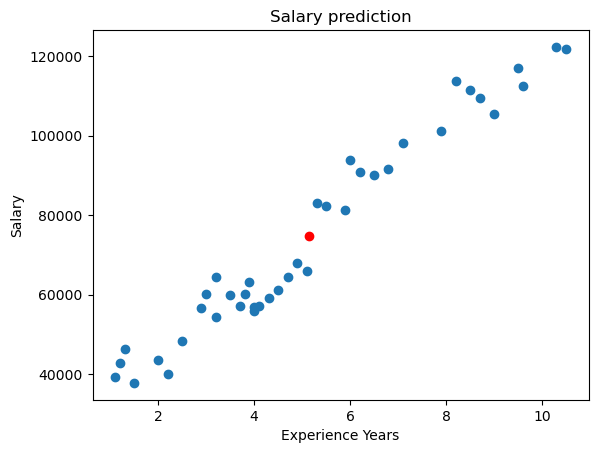

In [10]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary prediction')

In [11]:
m = reg.coef_
m

array([9523.65050742])

In [12]:
c = reg.intercept_
c

25673.015760530274

In [13]:
m*1.1 + c

array([36149.03131869])

In [14]:
reg.predict([[1.1]])

array([36149.03131869])

In [15]:
reg.score(x.values.reshape(-1,1),y)

0.9558814451799361

In [29]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x.values.reshape(-1,1)))

0.9558814451799361

# Cost & Lose

In [17]:
df['Predicted_salary'] = reg.predict(x.values.reshape(-1,1))

In [18]:
df.head()

,Experience Years,Salary,Predicted_salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


Text(0.5, 1.0, 'Salary prediction')

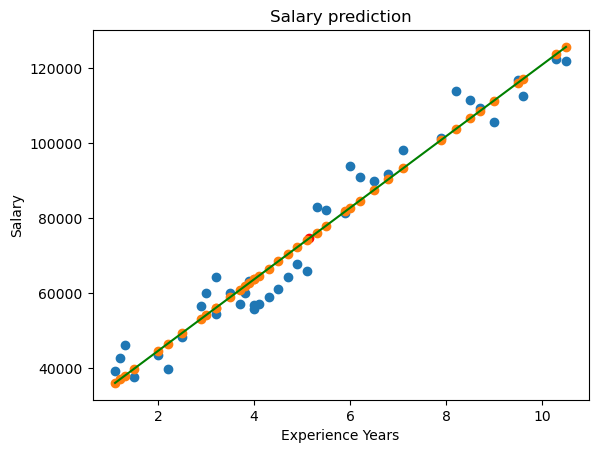

In [19]:
plt.plot(x.values.reshape(-1,1),df['Predicted_salary'],color = 'green')
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Experience Years'],df['Salary'])
# plt.scatter(df['Experience Years'],reg.predict(x.values.reshape(-1,1)))
plt.scatter(x.values.reshape(-1,1),reg.predict(x.values.reshape(-1,1)))
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary prediction')

In [20]:
df['Lose'] = df['Salary'] - df['Predicted_salary']

In [21]:
df.head()

,Experience Years,Salary,Predicted_salary,Lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mse = mean_squared_error(df['Salary'],df['Predicted_salary'])

In [24]:
mse

28960383.6537762

In [25]:
mae = mean_absolute_error(df['Salary'],df['Predicted_salary'])

In [26]:
mae

4516.281792544623

In [27]:
sum(abs(df['Lose']))/len(x)

4516.281792544623